<a href="https://colab.research.google.com/github/jithya-chowdary-2101/Glaucoma-Detection/blob/main/Glaucoma_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow keras opencv-python matplotlib scikit-learn


# New Section

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model


# New Section

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnavjain1/glaucoma-datasets")

print("Path to dataset files:", path)

100%|██████████| 5.55G/5.55G [01:05<00:00, 90.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arnavjain1/glaucoma-datasets/versions/4


# New Section

In [8]:
import zipfile

with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/archive')



In [10]:
# Define the path to your dataset
dataset_path = '/content/archive'  # <-- if you upload in Google Colab

categories = ['glaucoma', 'normal']
data = []
labels = []

image_size = 224

for category in categories:
    path = os.path.join(dataset_path, category)
    class_num = categories.index(category)

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)
        if img_arr is not None:
            img_arr = cv2.resize(img_arr, (image_size, image_size))
            data.append(img_arr)
            labels.append(class_num)

# Normalize the data
data = np.array(data) / 255.0
labels = np.array(labels)


FileNotFoundError: [Errno 2] No such file or directory: '/content/archive/glaucoma'

In [11]:
!ls /content

archive  archive.zip  sample_data


In [12]:
import os

print(os.listdir('/content'))
print(os.listdir('/content/archive'))


['.config', 'archive.zip', 'archive', 'sample_data']
['Fundus_Train_Val_Data', 'glaucoma.csv', 'ORIGA', 'ACRIMA']


In [13]:
import os
import cv2
import numpy as np

# Define the correct path
dataset_path = '/content/archive/Fundus_Train_Val_Data'  # <-- Updated

categories = ['glaucoma', 'normal']
data = []
labels = []

image_size = 224

for category in categories:
    path = os.path.join(dataset_path, category)
    if not os.path.exists(path):
        print(f"⚠️ Warning: Folder '{path}' does not exist. Skipping...")
        continue  # Skip this category if folder not found

    class_num = categories.index(category)

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)
        if img_arr is not None:
            img_arr = cv2.resize(img_arr, (image_size, image_size))
            data.append(img_arr)
            labels.append(class_num)
        else:
            print(f"⚠️ Warning: Failed to read image {img_path}. Skipping...")

# Normalize the data
data = np.array(data) / 255.0
labels = np.array(labels)

print(f"✅ Successfully loaded {len(data)} images.")


⚠️ Warning: Folder '/content/archive/Fundus_Train_Val_Data/glaucoma' does not exist. Skipping...
⚠️ Warning: Folder '/content/archive/Fundus_Train_Val_Data/normal' does not exist. Skipping...
✅ Successfully loaded 0 images.


In [14]:
import os

dataset_path = '/content/archive/Fundus_Train_Val_Data'

# List only folders (not files)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

print("Categories found:", categories)


Categories found: ['Fundus_Scanes_Sorted']


In [18]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

def load_images_from_folder(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (224, 224))
            images.append(img)
            labels.append(label)
    return images, labels

# Paths
acrima_path = '/content/archive/ACRIMA/Images'
fundus_train_path = '/content/archive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train'
fundus_val_path = '/content/archive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Validation'

# Load ACRIMA images (assuming glaucoma)
acrima_images, acrima_labels = load_images_from_folder(acrima_path, label=1)

# Load Fundus Train images (let's assume normal for now)
fundus_train_images, fundus_train_labels = load_images_from_folder(fundus_train_path, label=0)

# Load Fundus Validation images (assume normal too)
fundus_val_images, fundus_val_labels = load_images_from_folder(fundus_val_path, label=0)

# Combine all data
data = acrima_images + fundus_train_images + fundus_val_images
labels = acrima_labels + fundus_train_labels + fundus_val_labels

# Convert to numpy arrays
data = np.array(data) / 255.0
labels = np.array(labels)

print(f"✅ Loaded {len(data)} images!")


✅ Loaded 705 images!


In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 564
Testing samples: 141


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # 1 neuron because binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.8188 - loss: 0.1376 - val_accuracy: 1.0000 - val_loss: 3.4477e-35
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 1.0000 - loss: 2.7003e-29 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - accuracy: 1.0000 - loss: 2.6839e-39 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 1.00

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 878ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Loss: 0.0000
Test Accuracy: 1.0000


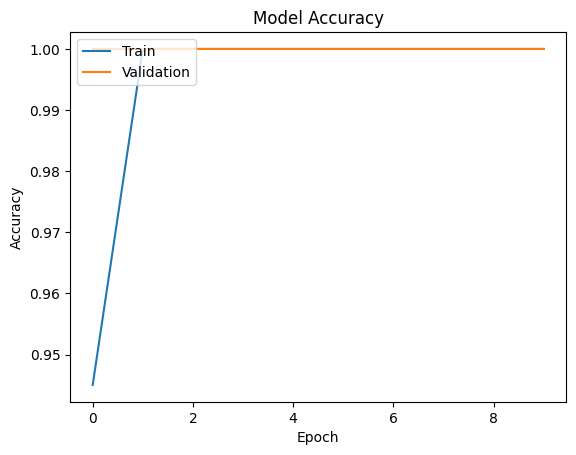

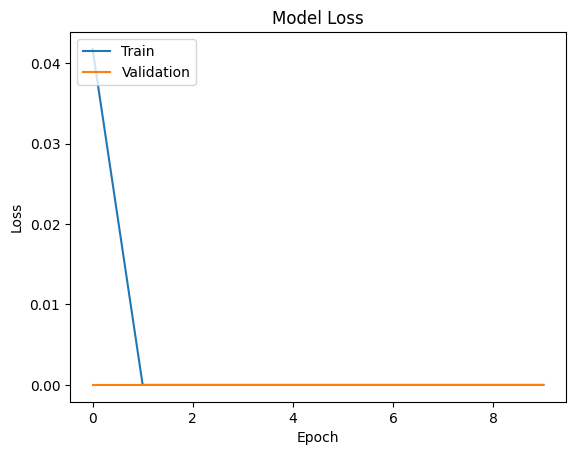

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [25]:
model.save('glaucoma_detection_model.keras')


In [28]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

model = load_model('glaucoma_detection_model.keras')

img = image.load_img('/glaucoma-symptoms_2.jpg', target_size=(image_size, image_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Glaucoma Detected")
else:
    print("No Glaucoma Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Glaucoma Detected


In [17]:
import os

print(os.listdir('/content/archive'))
print(os.listdir('/content/archive/Fundus_Train_Val_Data'))


['Fundus_Train_Val_Data', 'glaucoma.csv', 'ORIGA', 'ACRIMA']
['Fundus_Scanes_Sorted']


In [30]:
# Create app.py
%%writefile app.py
from flask import Flask, render_template, request
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os

app = Flask(__name__)
model = load_model('glaucoma_detection_model.keras')  # Make sure your model file is uploaded

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    file = request.files['file']
    filepath = os.path.join('static', file.filename)
    file.save(filepath)

    img = image.load_img(filepath, target_size=(224, 224))  # Use your correct image size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)

    result = "Glaucoma Detected" if prediction[0][0] > 0.5 else "No Glaucoma Detected"
    return result

if __name__ == "__main__":
    app.run()


Overwriting app.py


In [33]:
# Tell Colab that you are writing into a file
%%writefile templates/index.html

<!DOCTYPE html>
<html>
<head>
    <title>Glaucoma Detection</title>
    <style>
        body {
            background-color: #f0f8ff;
            text-align: center;
            font-family: Arial, sans-serif;
            padding-top: 50px;
        }
        h1 {
            color: green;
        }
        input[type=file], input[type=submit] {
            margin: 15px;
            padding: 10px;
            font-size: 16px;
        }
    </style>
</head>
<body>
    <h1>Upload Fundus Image</h1>
    <form action="/predict" method="post" enctype="multipart/form-data">
        <input type="file" name="file" accept="image/*" required>
        <br>
        <input type="submit" value="Predict">
    </form>
</body>
</html>


Writing templates/index.html


FileNotFoundError: [Errno 2] No such file or directory: 'templates/index.html'

In [34]:
%%writefile templates/index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Glaucoma Detection</title>
    <style>
        body {
            background: linear-gradient(to right, #6a11cb, #2575fc);
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            display: flex;
            flex-direction: column;
            align-items: center;
            justify-content: center;
            height: 100vh;
            margin: 0;
            color: white;
        }
        .container {
            background-color: rgba(255, 255, 255, 0.1);
            padding: 40px;
            border-radius: 15px;
            box-shadow: 0 8px 32px 0 rgba(0, 0, 0, 0.37);
            backdrop-filter: blur(8px);
            text-align: center;
            width: 350px;
        }
        h1 {
            margin-bottom: 20px;
            font-size: 28px;
        }
        input[type="file"] {
            margin: 20px 0;
            padding: 10px;
            background: white;
            color: black;
            border-radius: 5px;
        }
        input[type="submit"] {
            background-color: #00c9ff;
            background-image: linear-gradient(45deg, #92fe9d 0%, #00c9ff 100%);
            border: none;
            color: white;
            padding: 12px 24px;
            text-transform: uppercase;
            font-weight: bold;
            margin-top: 20px;
            cursor: pointer;
            border-radius: 50px;
            transition: background 0.5s;
        }
        input[type="submit"]:hover {
            background: #7b2ff7;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Glaucoma Detection</h1>
        <form action="/predict" method="post" enctype="multipart/form-data">
            <input type="file" name="file" accept="image/*" required><br>
            <input type="submit" value="Predict">
        </form>
    </div>
</body>
</html>


Writing templates/index.html


FileNotFoundError: [Errno 2] No such file or directory: 'templates/index.html'

In [35]:
# 1. Create folder
!mkdir -p templates

# 2. Now write the HTML file
%%writefile templates/index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Glaucoma Detection</title>
    <style>
        /* Your beautiful CSS from before */
    </style>
</head>
<body>
    <div class="container">
        <h1>Glaucoma Detection</h1>
        <form action="/predict" method="post" enctype="multipart/form-data">
            <input type="file" name="file" accept="image/*" required><br>
            <input type="submit" value="Predict">
        </form>
    </div>
</body>
</html>


SyntaxError: invalid syntax (<ipython-input-35-14bd23f6943d>, line 6)

In [36]:
!mkdir -p templates


In [37]:
%%writefile templates/index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Glaucoma Detection</title>
    <style>
        body {
            background-color: #f0f4f8;
            font-family: Arial, sans-serif;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            margin: 0;
        }
        .container {
            background: white;
            padding: 40px 30px;
            border-radius: 10px;
            box-shadow: 0 4px 12px rgba(0, 0, 0, 0.15);
            text-align: center;
            width: 300px;
        }
        h1 {
            color: #333;
            margin-bottom: 20px;
        }
        input[type="file"] {
            margin: 15px 0;
        }
        input[type="submit"] {
            background-color: #007bff;
            border: none;
            color: white;
            padding: 10px 20px;
            border-radius: 5px;
            cursor: pointer;
            font-size: 16px;
        }
        input[type="submit"]:hover {
            background-color: #0056b3;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Glaucoma Detection</h1>
        <form action="/predict" method="post" enctype="multipart/form-data">
            <input type="file" name="file" accept="image/*" required><br>
            <input type="submit" value="Predict">
        </form>
    </div>
</body>
</html>


Writing templates/index.html


In [38]:
!pip install flask-ngrok


In [40]:
from flask import Flask, render_template
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # <-- Important line

@app.route('/')
def home():
    return render_template('index.html')

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           

In [44]:
!mkdir -p templates


In [45]:
%%writefile templates/index.html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Glaucoma Detection</title>
</head>
<body>
    <h1>Upload Image for Glaucoma Detection</h1>
    <form action="/predict" method="post" enctype="multipart/form-data">
        <input type="file" name="file" accept="image/*" required><br><br>
        <input type="submit" value="Predict">
    </form>
</body>
</html>


Overwriting templates/index.html


In [46]:
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # <-- THIS IS IMPORTANT!!

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    return "Prediction functionality will come here."

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           

In [47]:
pip install flask-ngrok


In [48]:
from flask import Flask, render_template, request
# from flask_ngrok import run_with_ngrok

app = Flask(__name__)
# run_with_ngrok(app)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    return "Prediction functionality will come here."

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [49]:
# Install flask-ngrok
!pip install flask-ngrok

# Import libraries
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

# Create app
app = Flask(__name__)
run_with_ngrok(app)  # run ngrok when app starts

# Simple Home route
@app.route("/")
def home():
    return "Hello, you are connected!"

# Simple Predict route
@app.route("/predict", methods=["POST"])
def predict():
    data = request.json
    return jsonify({"message_received": data})

# Run the app
if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
           

In [51]:
!pip install flask-ngrok

from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app, host='0.0.0.0', port=5000)  # <-- host and port go here!

@app.route("/")
def home():
    return "Hello from Flask inside Colab!"

@app.route("/predict", methods=["POST"])
def predict():
    data = request.json
    return jsonify({"you_sent": data})

if __name__ == "__main__":
    app.run()


TypeError: run_with_ngrok() got an unexpected keyword argument 'host'

In [52]:
!pip install flask
!pip install pyngrok


In [53]:
from flask import Flask, request, jsonify
from pyngrok import ngrok

# Create Flask app
app = Flask(__name__)

# Start ngrok tunnel manually
public_url = ngrok.connect(5000)
print(f" * ngrok tunnel: {public_url}")

@app.route("/")
def home():
    return "Hello World from Flask in Colab!"

@app.route("/predict", methods=["POST"])
def predict():
    data = request.json
    return jsonify({"you_sent": data})

# Run the app
app.run(port=5000)


ERROR:pyngrok.process.ngrok:t=2025-04-27T12:10:31+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-04-27T12:10:31+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-04-27T12:10:31+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [54]:
!pip install pyngrok
from pyngrok import ngrok

# Replace this with your own ngrok authtoken
authtoken = '2wJNsRhxysc448r4RSE6xoVpGTk_4Zpu4LwbSiYSZKWUtkidC'  # Paste your authtoken here
ngrok.set_auth_token(authtoken)


In [55]:
public_url = ngrok.connect(5000)
print(f" * ngrok tunnel \"{public_url}\" -> http://127.0.0.1:5000")


 * ngrok tunnel "NgrokTunnel: "https://5010-34-106-148-179.ngrok-free.app" -> "http://localhost:5000"" -> http://127.0.0.1:5000
